In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [27]:
def VR(x, y, limiar, min_sample_split=5):
    n = len(y)
    vr = np.var(y, ddof=1)
    y_l = y[x <= limiar]
    y_r = y[x > limiar]

    if len(y_l) < min_sample_split or len(y_r) < min_sample_split:
        return 0

    vr -= (len(y_l) / n) * np.var(y_l, ddof=1)
    vr -= (len(y_r) / n) * np.var(y_r, ddof=1)

    return vr


def print_vr(x, y, limiar, min_sample_split=5):
    n = len(y)
    var = np.var(y, ddof=1)
    y_l = y[x <= limiar]
    y_r = y[x > limiar]

    if len(y_l) < min_sample_split or len(y_r) < min_sample_split:
        return 0

    var_l = np.var(y_l, ddof=1)
    var_r = np.var(y_r, ddof=1)

    vr = var - len(y_l) / n * var_l - len(y_r) / n * var_r

    print(f"VR(y, x, {limiar}) = {var:.2f} - ({len(y_l)} / {n}) x {var_l:.2f} - ({len(y_r)} / {n}) x {var_r:.2f} = {vr:.2f}")


In [28]:
def testa_todos(x, y, heuristica):
    ordenados = np.unique(sorted(x))

    candidatos = []
    for i in range(1, len(ordenados)):
        limiar = (ordenados[i - 1] + ordenados[i]) / 2
        candidatos.append((limiar, heuristica(x, y, limiar)))

    return candidatos


def melhor_split(candidatos):
    return max(candidatos, key=lambda c: c[1])

In [29]:
def plot_1dtree(x, y, heuristica, min_sample_split):
    queue = [(x, y, 1)]

    markers = {
        0: "o",
        1: "^"
    }

    colors = {
        0: "blue",
        1: "black"
    }
    for c in np.unique(y):
        x_aux = x[y == c]
        plt.scatter(x_aux, [0 for _ in range(len(x_aux))], c=colors[c], marker=markers[c])


    while len(queue) > 0:
        x_aux, y_aux, alt = queue.pop(0)

        # Número minimo de amostras
        if len(x_aux) < min_sample_split:
            continue

        # Partição homogênea
        if len(np.unique(y_aux)) == 1:
            continue

        limiar, ig = melhor_split(testa_todos(x_aux, y_aux, heuristica))

        plt.axvline(limiar, ymax=alt)

        x_l, y_l = x_aux[x_aux <= limiar], y_aux[x_aux <= limiar]
        queue.append((x_l, y_l, alt * 0.9))
        x_r, y_r = x_aux[x_aux > limiar], y_aux[x_aux > limiar]
        queue.append((x_r, y_r, alt * 0.9))

    plt.show()

In [30]:
rng = np.random.default_rng(7)

y = list(rng.normal(0, 0.1, 30))
y.extend(rng.normal(-0.5, 0.2, 35))
y.extend(rng.normal(1.5, 0.9, 35))
y = np.array(y)

x = np.linspace(0, 10, len(y))

Text(0.5, 1.0, 'Qual é o melhor ponto de corte?')

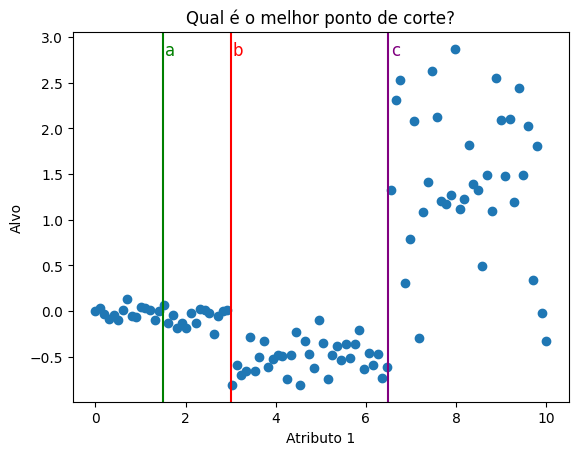

In [31]:
plt.scatter(x, y)
plt.xlabel("Atributo 1")
plt.ylabel("Alvo")

plt.axvline(1.5, c="green")
plt.axvline(3.0, c="red")
plt.axvline(6.5, c="purple")

plt.annotate("a", (1.55, 2.8), c="green", size=12)
plt.annotate("b", (3.05, 2.8), c="red", size=12)
plt.annotate("c", (6.55, 2.8), c="purple", size=12)

plt.title("Qual é o melhor ponto de corte?")

In [32]:
VR(x, y, 1.5), VR(x, y, 3.0), VR(x, y, 6.55)

(0.016716550560868182, 0.048870444259260126, 0.6765775929724207)

In [33]:
print_vr(x, y, 1.5)
print_vr(x, y, 3.0)
print_vr(x, y, 6.55)

VR(y, x, 1.5) = 0.96 - (15 / 100) x 0.00 - (85 / 100) x 1.11 = 0.02
VR(y, x, 3.0) = 0.96 - (30 / 100) x 0.01 - (70 / 100) x 1.30 = 0.05
VR(y, x, 6.55) = 0.96 - (65 / 100) x 0.08 - (35 / 100) x 0.67 = 0.68


In [34]:
df = pd.DataFrame(x, columns=["Atributo 1"])
df["Alvo"] = y

df.index += 1
df.head(7)

,Atributo 1,Alvo
1,0.000000,0.000123
2,0.101010,0.029875
3,0.202020,-0.027414
4,0.303030,-0.089059
5,0.404040,-0.045467
6,0.505051,-0.099165
7,0.606061,0.006014


In [35]:
melhor_split(testa_todos(x, y, VR))

(6.515151515151516, 0.6765775929724207)

Text(0.5, 1.0, 'Qual é o melhor ponto de corte? R: teste todos!')

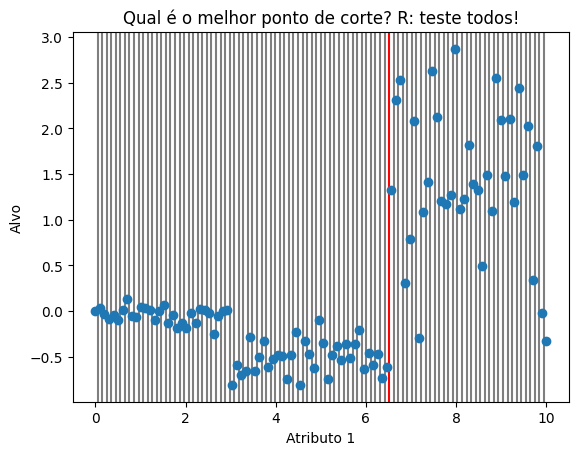

In [36]:
plt.scatter(x, y)
plt.xlabel("Atributo 1")
plt.ylabel("Alvo")

best = melhor_split(testa_todos(x, y, VR))[0]

uq = np.unique(sorted(x))
for i in range(1, len(uq)):
    limiar = (uq[i - 1] + uq[i]) / 2

    if limiar != best:
        plt.axvline(limiar, c="black", alpha=0.5, zorder=0)
    else:
        plt.axvline(limiar, c="red", alpha=1, zorder=0)

plt.title("Qual é o melhor ponto de corte? R: teste todos!")

In [37]:
from sklearn import tree

[Text(0.5, 0.75, 'Atributo 1 <= 6.515\nsamples = 100\nvalue = 0.308'),
 Text(0.25, 0.25, 'samples = 65\nvalue = -0.295'),
 Text(0.75, 0.25, 'samples = 35\nvalue = 1.427')]

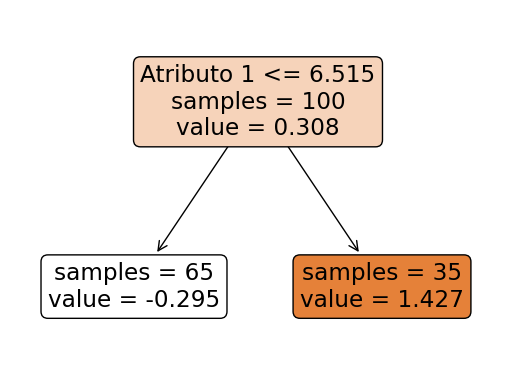

In [38]:
dt = tree.DecisionTreeRegressor(max_depth=1)
dt.fit(x.reshape(-1, 1), y)

tree.plot_tree(dt, feature_names=["Atributo 1"], filled=True, impurity=False, rounded=True)

Text(0.5, 1.0, 'Segunda partição')

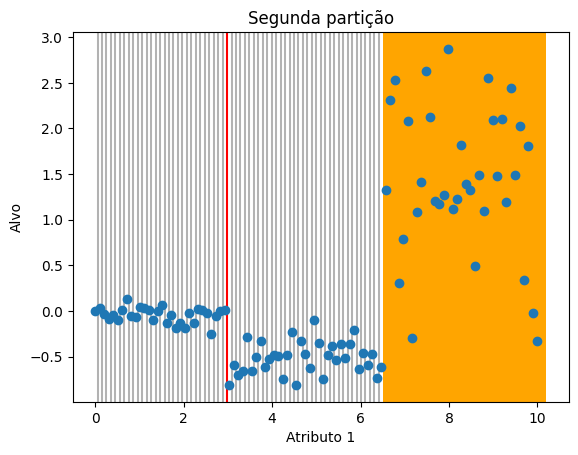

In [39]:
plt.scatter(x, y)
plt.xlabel("Atributo 1")
plt.ylabel("Alvo")

best2 = melhor_split(testa_todos(x[x <= best], y[x <= best], VR))[0]

uq = sorted(x[x <= best])
for i in range(1, len(uq)):
    limiar = (uq[i - 1] + uq[i]) / 2

    if limiar != best2:
        plt.axvline(limiar, c="black", alpha=0.3, zorder=0)
    else:
        plt.axvline(limiar, c="red", alpha=1, zorder=0)

plt.axvspan(best, 10.2, facecolor='orange', alpha=1, zorder=-1)
plt.title("Segunda partição")

In [40]:
best2

2.9797979797979797

[Text(0.6, 0.8333333333333334, 'Atributo 1 <= 6.515\nsamples = 100\nvalue = 0.308'),
 Text(0.4, 0.5, 'Atributo 1 <= 2.98\nsamples = 65\nvalue = -0.295'),
 Text(0.2, 0.16666666666666666, 'samples = 30\nvalue = -0.041'),
 Text(0.6, 0.16666666666666666, 'samples = 35\nvalue = -0.512'),
 Text(0.8, 0.5, 'samples = 35\nvalue = 1.427')]

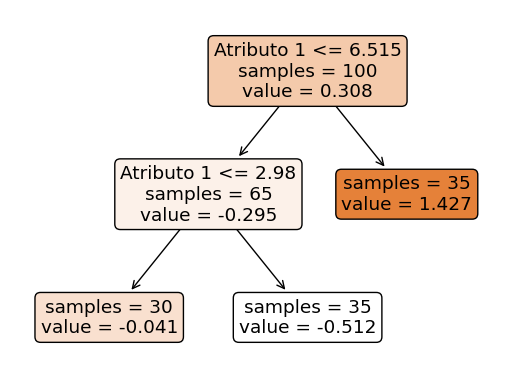

In [41]:
dt = tree.DecisionTreeRegressor(ccp_alpha=0.03, min_samples_leaf=5)
dt.fit(x.reshape(-1, 1), y)

tree.plot_tree(dt, feature_names=["Atributo 1"], filled=True, impurity=False, rounded=True)

# 2D

Text(0, 0.5, 'Alvo')

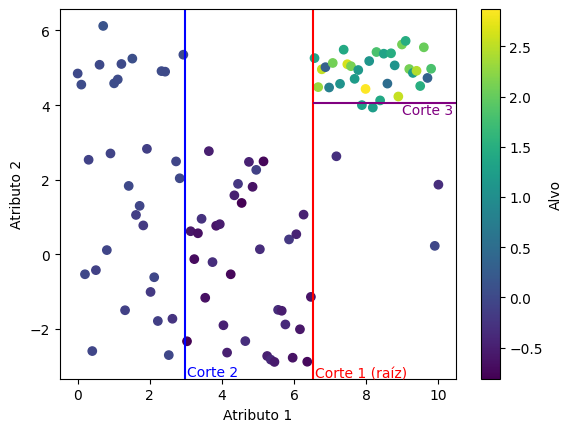

In [42]:
x2 = np.zeros_like(x)
x2[y > 0] = rng.normal(5, 0.5, len(x2[y > 0]))
x2[y <= 0] = rng.uniform(-3, 3, len(x2[y <= 0]))

plt.scatter(x, x2, c=y)

plt.axvline(6.515, color="red")
plt.annotate("Corte 1 (raíz)", (6.565, -3.3), color="red")

plt.axvline(2.98, color="blue")
plt.annotate("Corte 2", (3.03, -3.25), color="blue")

plt.axhline(4.064, xmin=0.64, xmax=10.2, color="purple")
plt.annotate("Corte 3", (9, 3.75), color="purple")

plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
bar = plt.colorbar()
bar.ax.set_ylabel("Alvo")

[Text(0.5, 0.8333333333333334, 'Atributo 1 <= 6.515\nsamples = 100\nvalue = 0.308'),
 Text(0.25, 0.5, 'Atributo 1 <= 2.98\nsamples = 65\nvalue = -0.295'),
 Text(0.125, 0.16666666666666666, 'samples = 30\nvalue = -0.041'),
 Text(0.375, 0.16666666666666666, 'samples = 35\nvalue = -0.512'),
 Text(0.75, 0.5, 'Atributo 2 <= 4.064\nsamples = 35\nvalue = 1.427'),
 Text(0.625, 0.16666666666666666, 'samples = 5\nvalue = 0.371'),
 Text(0.875, 0.16666666666666666, 'samples = 30\nvalue = 1.603')]

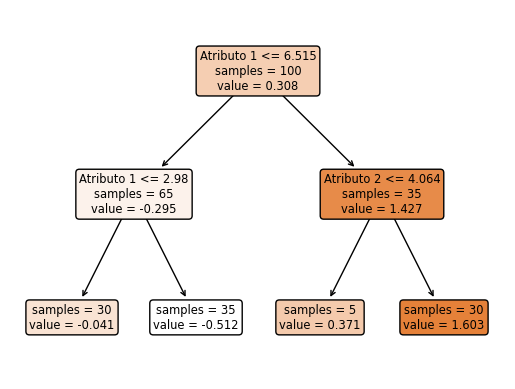

In [43]:
dt = tree.DecisionTreeRegressor(ccp_alpha=0.03, min_samples_leaf=5)
dt.fit(np.vstack((x, x2)).T, y)

tree.plot_tree(dt, feature_names=["Atributo 1", "Atributo 2"], filled=True, impurity=False, rounded=True)

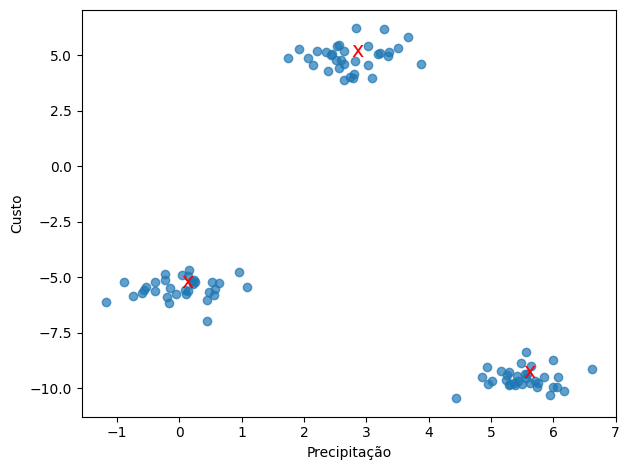

In [44]:
from sklearn.datasets import make_blobs


X, y_blob = make_blobs(random_state=10, centers=3, cluster_std=0.5)


plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.annotate("x", np.mean(X[y_blob == 0], axis=0), c="red", size=15)
plt.annotate("x", np.mean(X[y_blob == 1], axis=0), c="red", size=15)
plt.annotate("x", np.mean(X[y_blob == 2], axis=0), c="red", size=15)


plt.xlabel("Precipitação")
plt.ylabel("Custo")
plt.tight_layout()